<a href="https://colab.research.google.com/github/asin977/DATASCIENCE-ASSIGNMENT/blob/main/EXIT_TEST_DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Update the file path accordingly
file_path = '/content/drive/MyDrive/customer_churn.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


PREPROCESSING THE DATASET


In [ ]:
# Check for nulls
print(df.isnull().sum())

# Convert total charges to numeric (some may be strings or blanks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Drop customerID if present
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Convert target variable to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [4]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64


In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')


df = df.drop(columns=['customerID'])


print(df.isnull().sum())


df.fillna(df.mean(), inplace=True)


label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)


print(df.head())


df.to_csv('encoded_customer_churn.csv', index=False)


gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64


TypeError: can only concatenate str (not "int") to str

In [65]:
print(df.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [89]:
df["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [90]:
df["MonthlyCharges"].nunique()

1585

In [91]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [92]:
df["TotalCharges"].nunique()

6526

In [93]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["PaymentMethod"].unique()

In [88]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)', nan], dtype=object)

In [87]:
df["PaperlessBilling"].unique()

array(['Yes', 'No', nan], dtype=object)

In [86]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year', nan], dtype=object)

In [85]:
df["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [84]:
df["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [83]:
df["TechSupport"].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [82]:
df["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [66]:
df['gender'].unique()


array(['Female', 'Male'], dtype=object)

In [70]:
df["SeniorCitizen"].unique()

array([ 0.,  1., nan])

In [71]:
df["SeniorCitizen"].nunique()

2

In [72]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [73]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [74]:
df["tenure"].unique()

array([ 1., 34.,  2., 45.,  8., 22., 10., 28., 62., 13., 16., 58., 49.,
       nan, 72., 17., 71., 27.,  5., 46., 11., 70., 63., 52., 69., 43.,
       15., 25., 60., 18., 66., 47.,  9.,  3., 31., 50., 64., 56., 30.,
        7., 42., 35., 48., 29., 65., 12., 38., 68., 32., 55., 37., 36.,
       41.,  6.,  4., 33., 67., 23., 57., 61., 14., 20., 53., 40., 59.,
       24., 44., 19., 54., 51., 21., 26.,  0., 39.])

In [75]:
df["tenure"].nunique()

73

In [95]:

print(df["tenure"].head())


0     1.0
1    34.0
2     2.0
3    45.0
4     2.0
Name: tenure, dtype: float64


In [96]:

scaler = StandardScaler()
df["tenure_scaled"] = scaler.fit_transform(df[["tenure"]])


print(df["tenure_scaled"].head())


0   -1.277238
1    0.066470
2   -1.236520
3    0.514373
4   -1.236520
Name: tenure_scaled, dtype: float64


In [77]:
df["PhoneService"].unique()

array(['No', 'Yes', nan], dtype=object)

In [78]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes', nan], dtype=object)

In [80]:
df["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service', nan], dtype=object)

In [79]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No', nan], dtype=object)

In [81]:
df["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service', nan], dtype=object)

In [94]:
import pandas as pd
import numpy as np


df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

Q1 = df["TotalCharges"].quantile(0.25)
Q3 = df["TotalCharges"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["TotalCharges"] >= lower_bound) & (df["TotalCharges"] <= upper_bound)]


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["TotalCharges"] = scaler.fit_transform(df[["TotalCharges"]])


print(df["TotalCharges"].head())


0   -0.994287
1   -0.172905
2   -0.959703
3   -0.194437
4   -0.940490
Name: TotalCharges, dtype: float64


<ipython-input-94-ff8ac3b5687e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)  # Fill NaNs with median value


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

cat_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


df = df.drop('customerID', axis=1)


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


print(df.isnull().sum().sum())


0


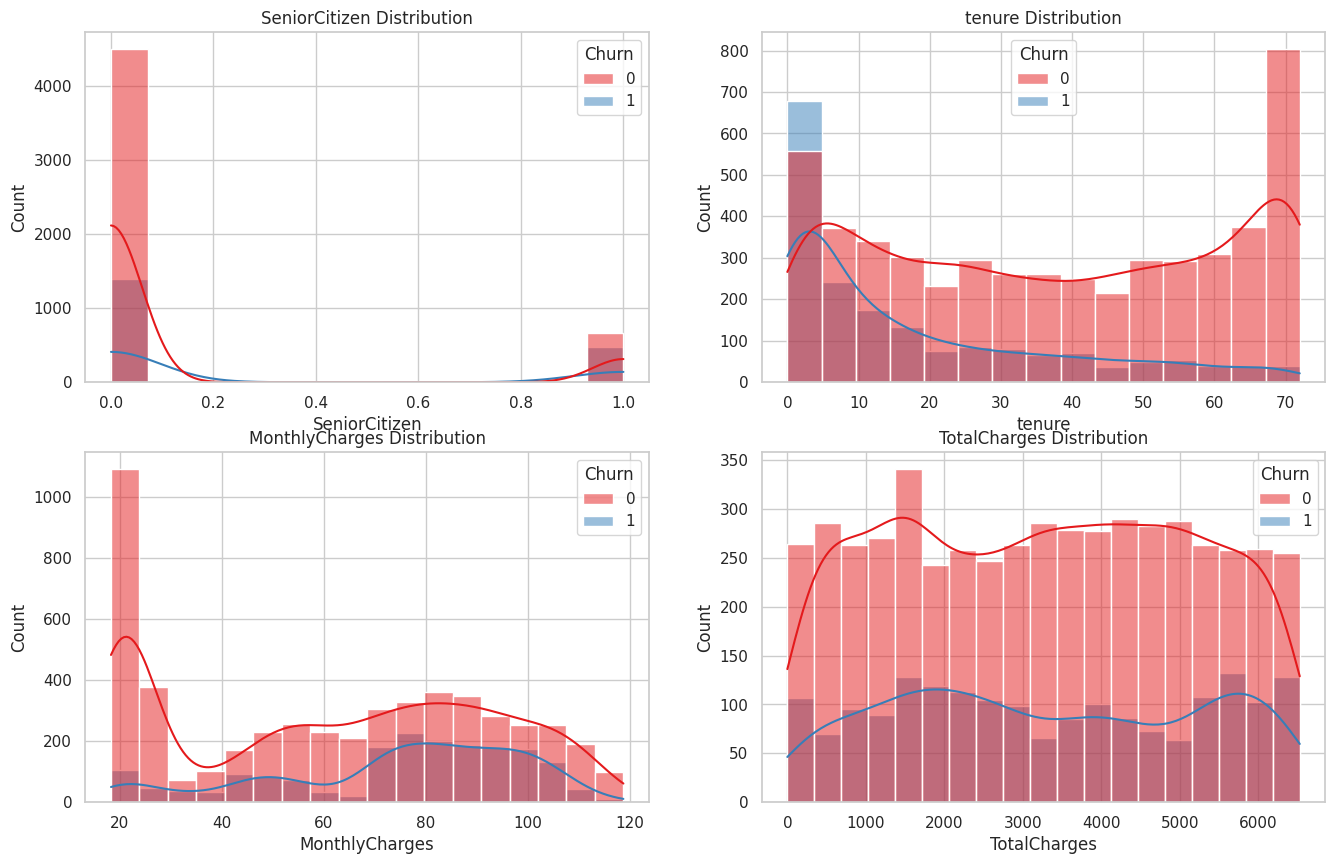

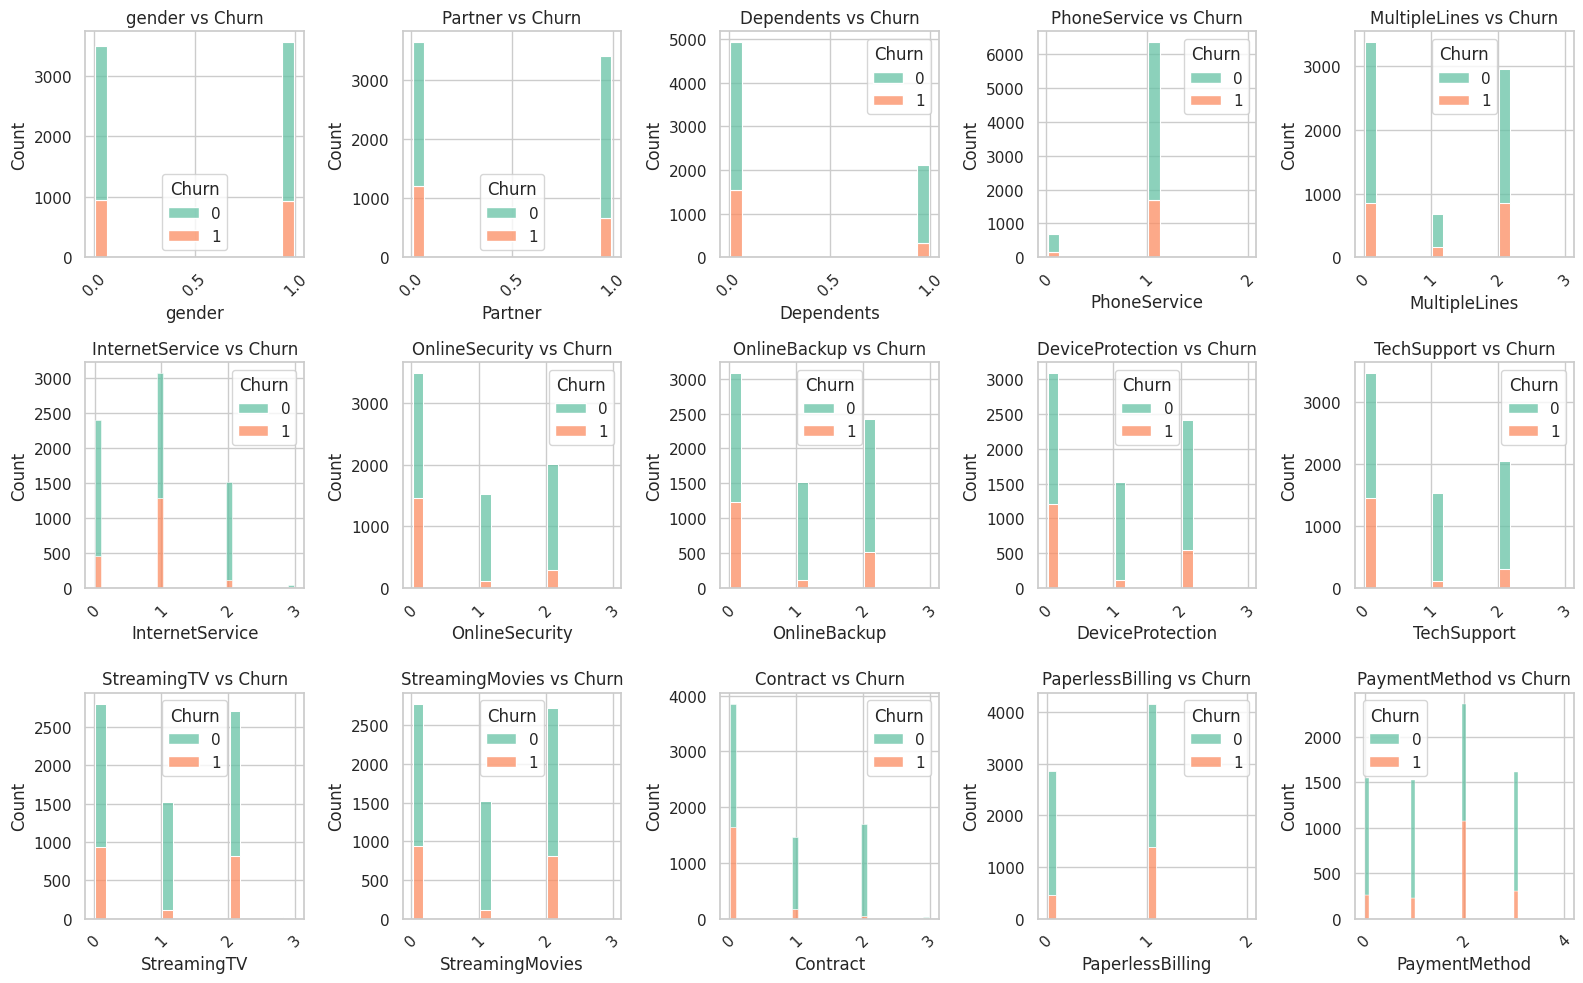

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']


plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, kde=True, hue='Churn', palette='Set1')
    plt.title(f'{col} Distribution')


plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 5, i)
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', palette='Set2', shrink=0.8)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


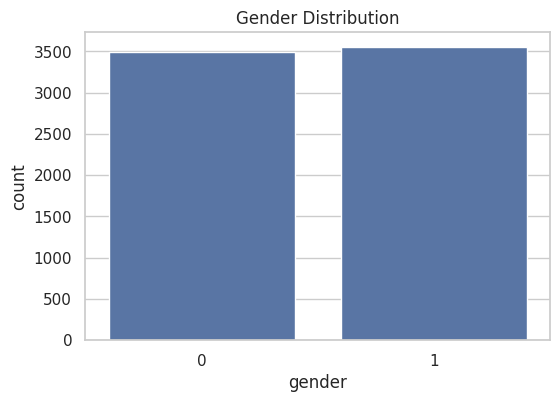

In [28]:

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


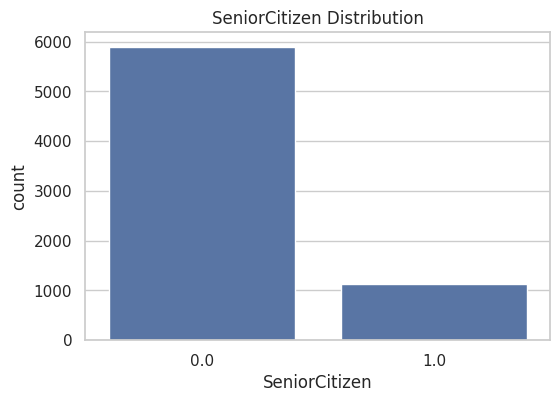

In [29]:

plt.figure(figsize=(6, 4))
sns.countplot(x='SeniorCitizen', data=df)
plt.title('SeniorCitizen Distribution')
plt.show()


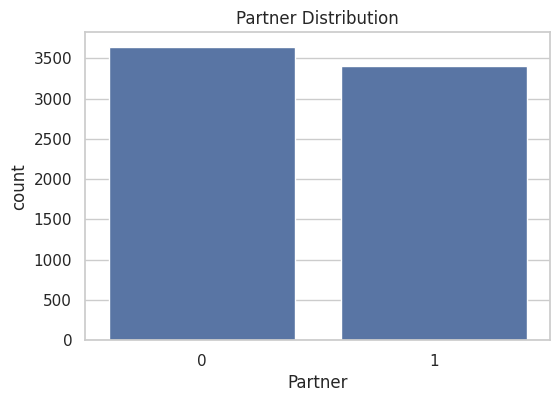

In [30]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Partner', data=df)
plt.title('Partner Distribution')
plt.show()


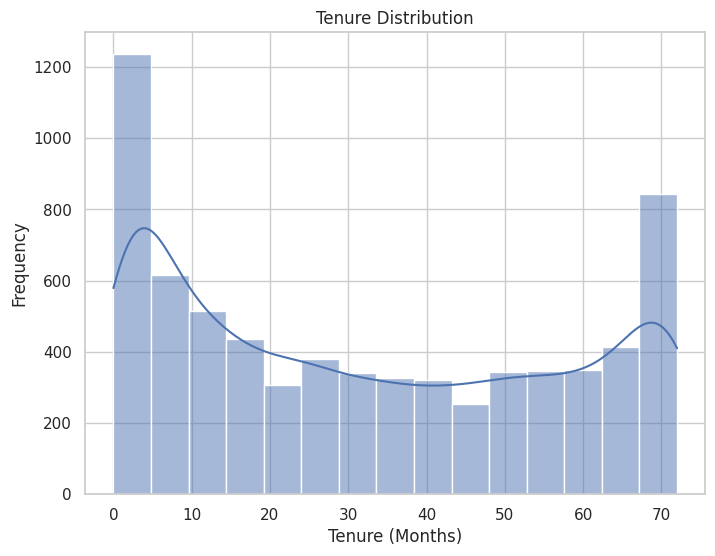

In [31]:

plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


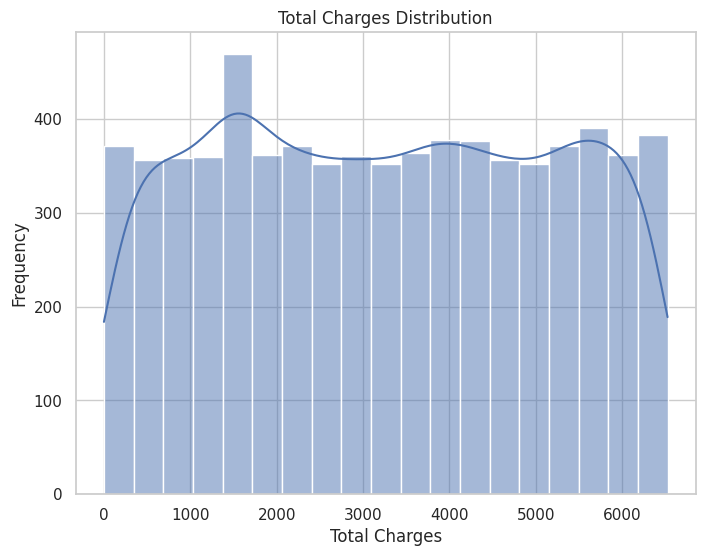

In [32]:

plt.figure(figsize=(8, 6))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


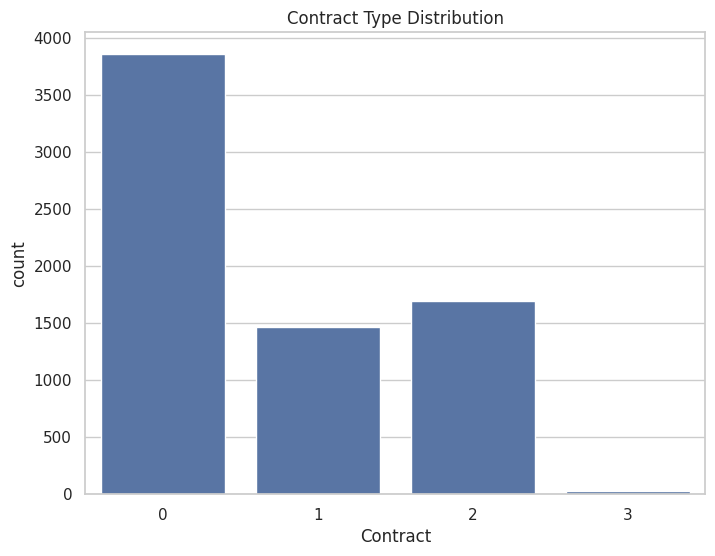

In [33]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=df)
plt.title('Contract Type Distribution')
plt.show()


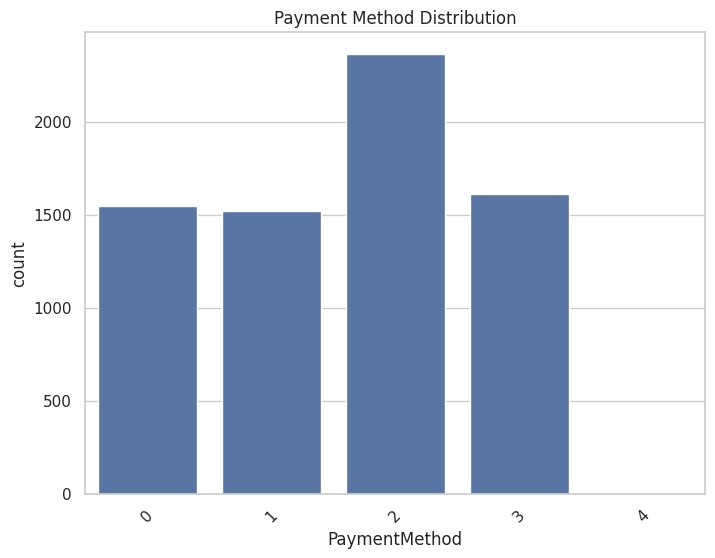

In [35]:

plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=df)
plt.title('Payment Method Distribution')
plt.xticks(rotation=45)
plt.show()


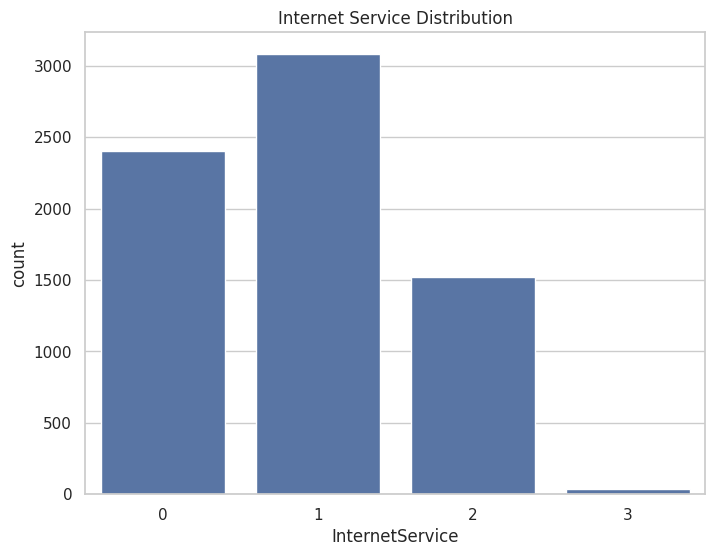

In [34]:

plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', data=df)
plt.title('Internet Service Distribution')
plt.show()


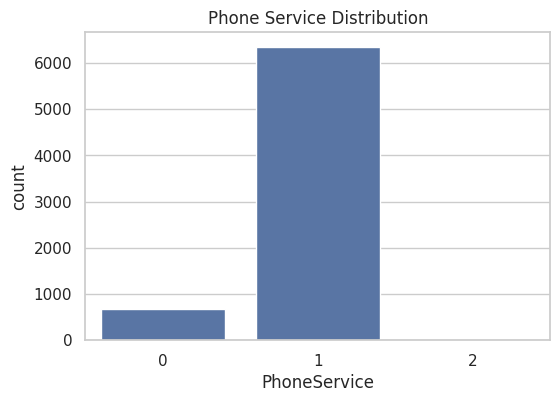

In [36]:

plt.figure(figsize=(6, 4))
sns.countplot(x='PhoneService', data=df)
plt.title('Phone Service Distribution')
plt.show()


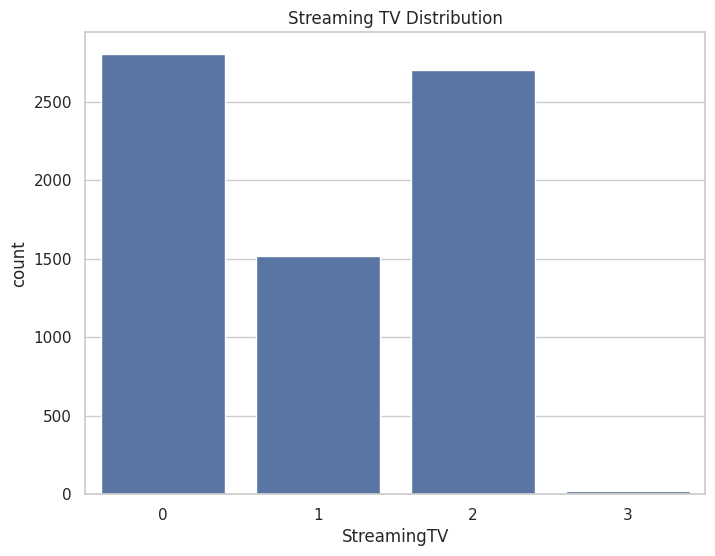

In [37]:

plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingTV', data=df)
plt.title('Streaming TV Distribution')
plt.show()


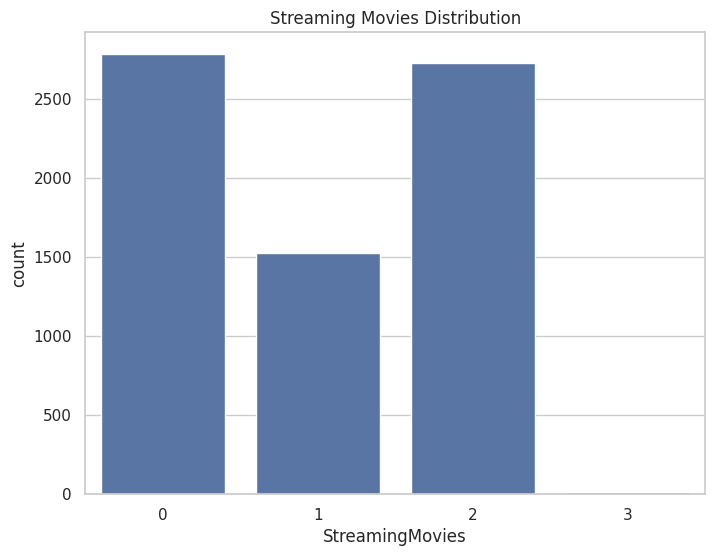

In [38]:

plt.figure(figsize=(8, 6))
sns.countplot(x='StreamingMovies', data=df)
plt.title('Streaming Movies Distribution')
plt.show()


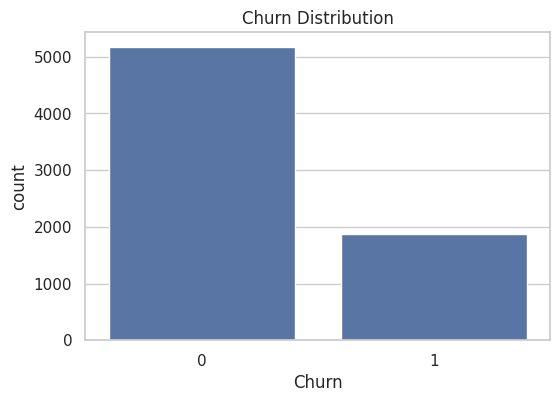

In [39]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


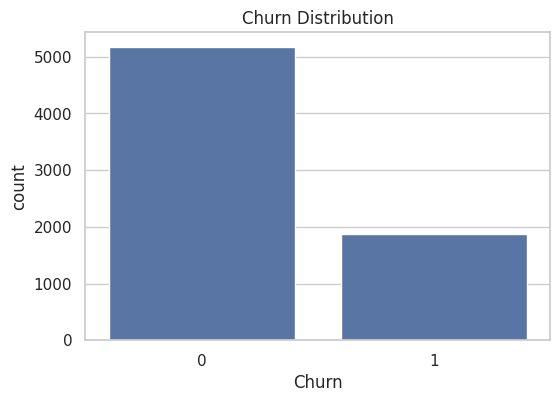

In [42]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


CORRELATION HEAT MAP


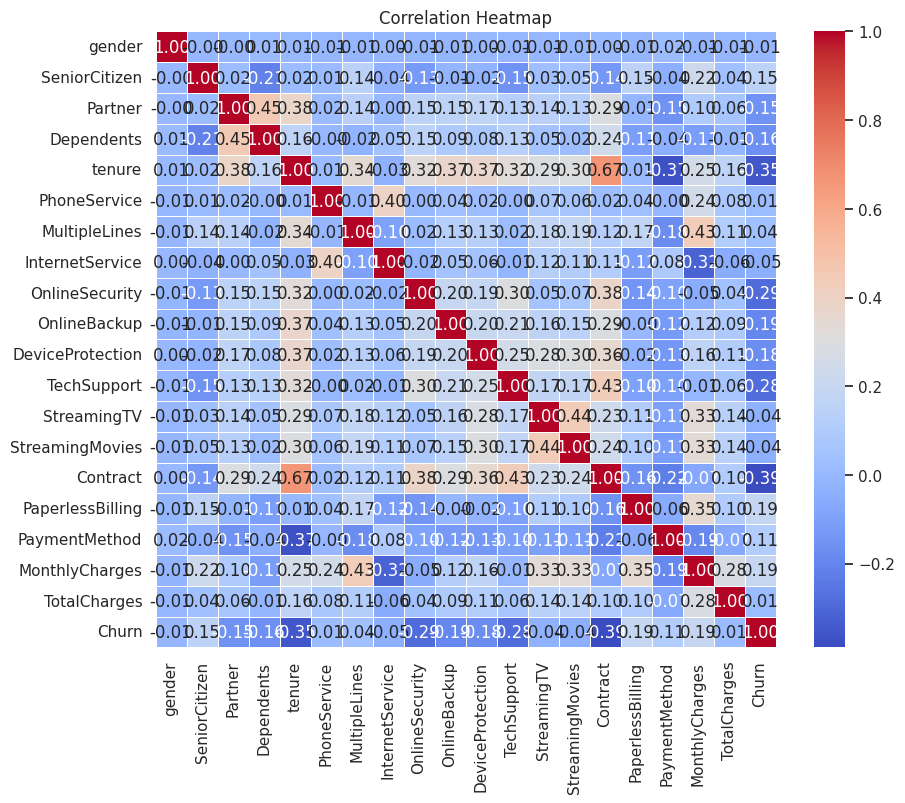

In [40]:

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


PAIR PLOT

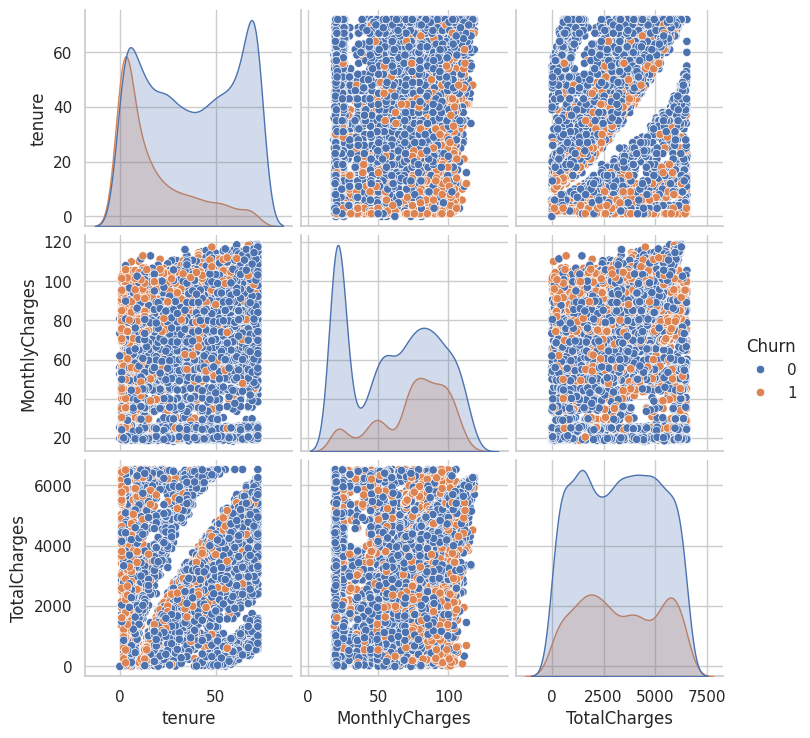

In [41]:

sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()


BOX PLOT FOR OUTLIERS


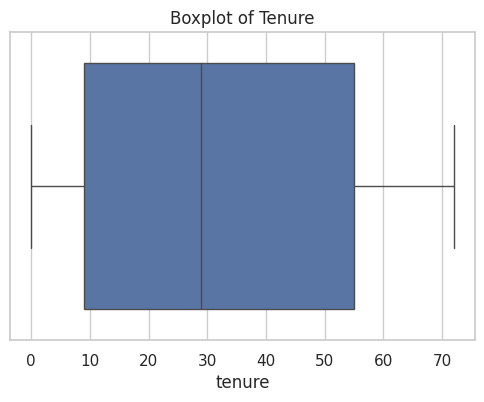

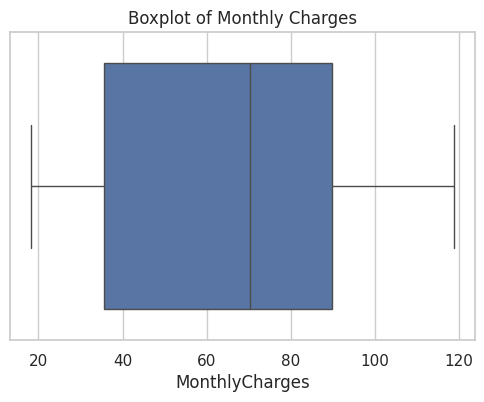

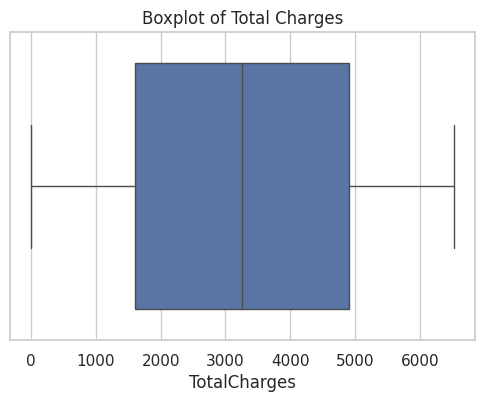

In [43]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of Tenure')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.show()


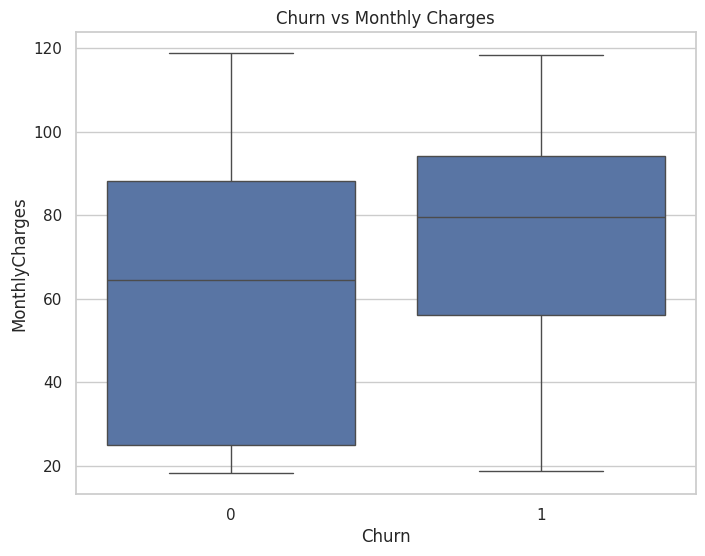

In [44]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs Monthly Charges')
plt.show()


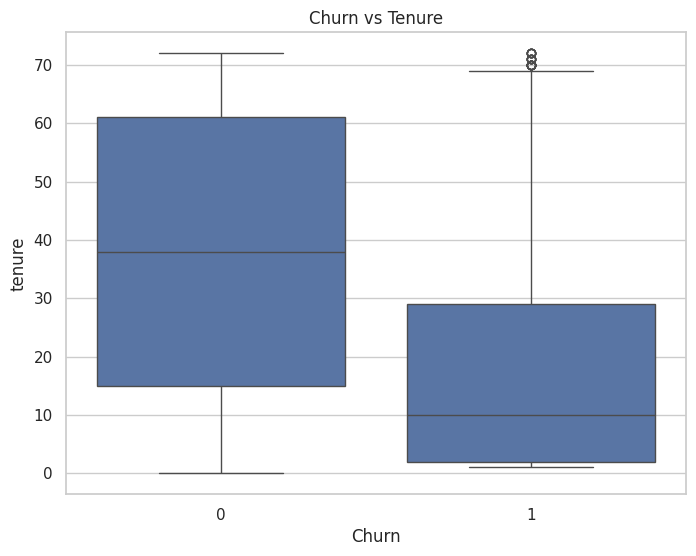

In [45]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs Tenure')
plt.show()


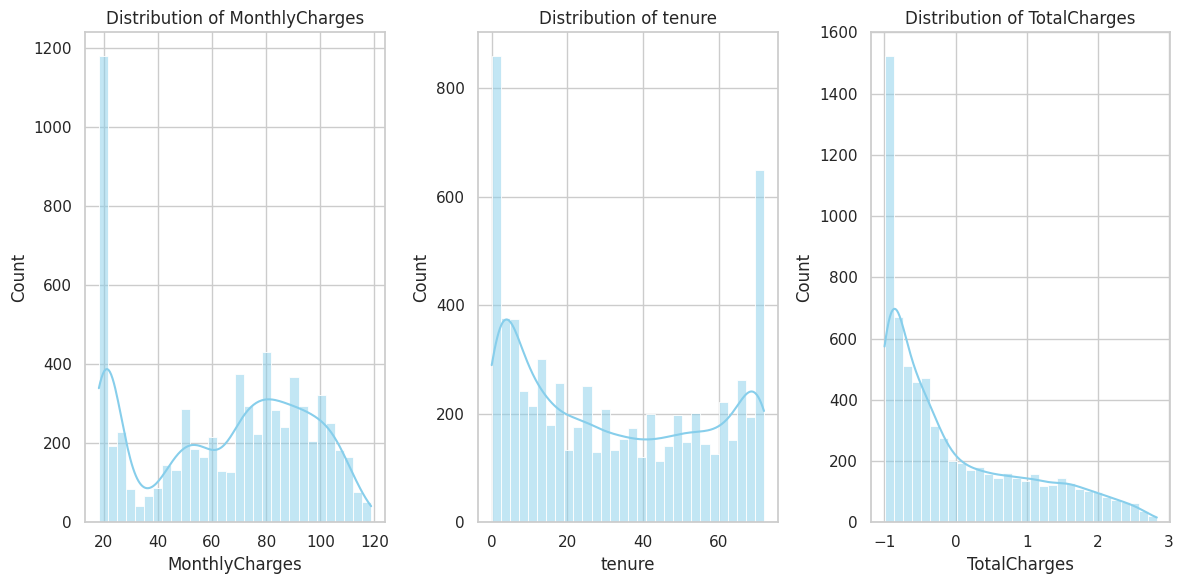

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


numerical_columns = ['MonthlyCharges', 'tenure', 'TotalCharges']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


<ipython-input-120-96f266873a2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


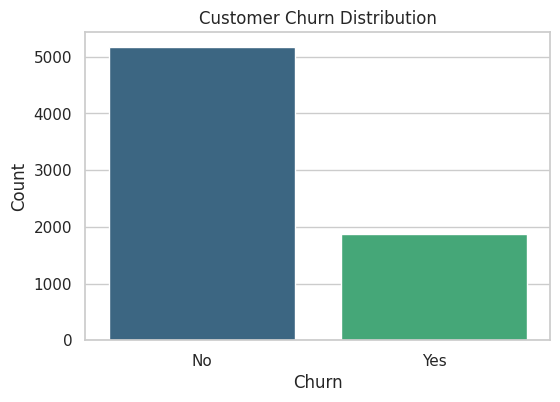

In [120]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


<ipython-input-121-df0c6808a254>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


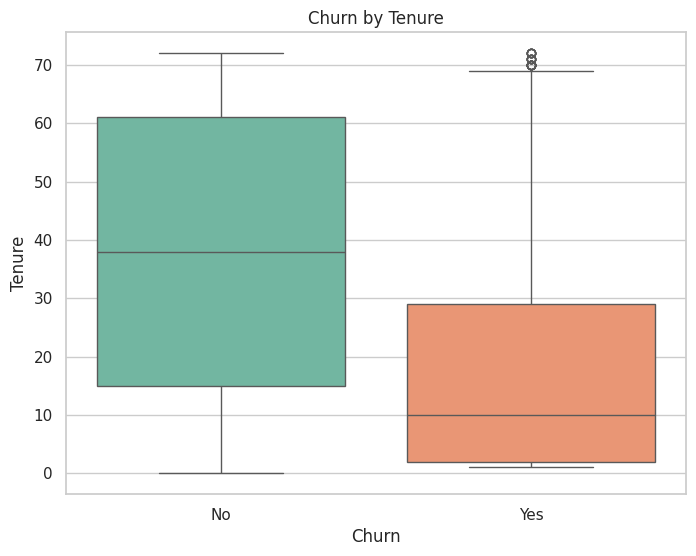

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168
Confusion Matrix:
 [[949  87]
 [201 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [8]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/customer_churn.csv")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df = df.dropna()

HANDLING THE OUTLIERS


In [17]:

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers for {col}:")
    print(outliers[[col, 'Churn']])
    print("\n")


Outliers for SeniorCitizen:
      SeniorCitizen  Churn
20              1.0      1
30              1.0      0
31              1.0      0
34              1.0      0
50              1.0      0
...             ...    ...
7023            1.0      0
7029            1.0      0
7031            1.0      0
7032            1.0      1
7041            1.0      1

[1140 rows x 2 columns]


Outliers for tenure:
Empty DataFrame
Columns: [tenure, Churn]
Index: []


Outliers for MonthlyCharges:
Empty DataFrame
Columns: [MonthlyCharges, Churn]
Index: []


Outliers for TotalCharges:
Empty DataFrame
Columns: [TotalCharges, Churn]
Index: []




REMOVE OUTLIERS

In [19]:

df_cleaned = df[df['SeniorCitizen'] != 1.0]




In [9]:

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/customer_churn.csv")
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [97]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(5634, 20) (1409, 20)


LOGISTIC REGRESSION


In [100]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

if X_train_encoded.isnull().any().any():
    X_train_encoded.fillna(0, inplace=True)

if X_test_encoded.isnull().any().any():
    X_test_encoded.fillna(0, inplace=True)

model = LogisticRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

[[932 104]
 [152 221]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_encoded, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [102]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_encoded, y_train)


LogisticRegression(max_iter=500)

In [104]:
from sklearn.preprocessing import StandardScaler
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [105]:
model = LogisticRegression(max_iter=500, C=0.1)
model.fit(X_train_encoded, y_train)


LogisticRegression(C=0.1, max_iter=500)

In [106]:
model = LogisticRegression(max_iter=500, solver='saga')
model.fit(X_train_encoded, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [10]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168
[[949  87]
 [201 172]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



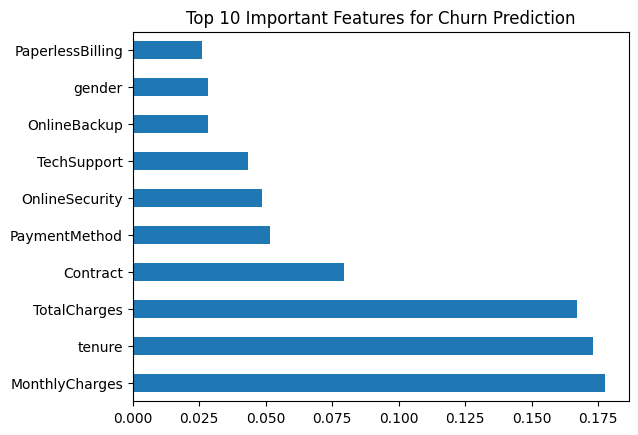

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[949  87]
 [201 172]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



DECISION TREE

In [21]:

import numpy as np
import pandas as pd


feature_importances = model.feature_importances_


features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(features)


Feature Importances:
             Feature  Importance
17    MonthlyCharges    0.177683
4             tenure    0.173179
18      TotalCharges    0.167220
14          Contract    0.079489
16     PaymentMethod    0.051590
8     OnlineSecurity    0.048792
11       TechSupport    0.043452
9       OnlineBackup    0.028495
0             gender    0.028259
15  PaperlessBilling    0.025961
7    InternetService    0.024539
2            Partner    0.023957
6      MultipleLines    0.023169
10  DeviceProtection    0.021556
1      SeniorCitizen    0.021121
3         Dependents    0.019854
13   StreamingMovies    0.018169
12       StreamingTV    0.017774
5       PhoneService    0.005739


In [22]:

X_reduced = X.drop(columns=['PhoneService', 'StreamingTV', 'StreamingMovies'])

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
model_reduced.fit(X_train, y_train)


y_pred_reduced = model_reduced.predict(X_test)


print("Accuracy with Reduced Features:", accuracy_score(y_test, y_pred_reduced))
print("Confusion Matrix (Reduced Model):")
print(confusion_matrix(y_test, y_pred_reduced))
print("Classification Report (Reduced Model):")
print(classification_report(y_test, y_pred_reduced))


Accuracy with Reduced Features: 0.7977288857345636
Confusion Matrix (Reduced Model):
[[947  89]
 [196 177]]
Classification Report (Reduced Model):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [23]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_model = random_search.best_estimator_


y_pred_best = best_model.predict(X_test)


print("Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Best Score: 0.7976570820021299
Accuracy of Best Model: 0.8147622427253371
Confusion Matrix (Best Model):
[[961  75]
 [186 187]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1036
           1       0.71      0.50      0.59       373

    accuracy                           0.81      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



PRINCIPLE COMPONENT ANALYSIS

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 2142     No
1623     No
6074    Yes
1362    Yes
6754     No
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5634, dtype: object

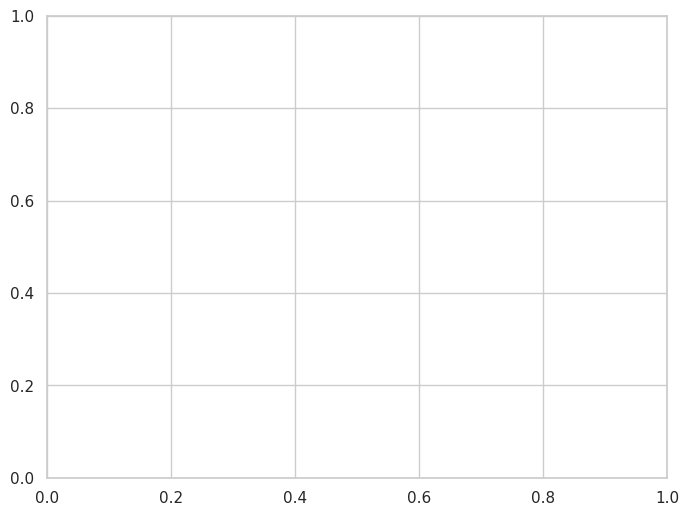

In [113]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_encoded)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Churn (0: No, 1: Yes)')
plt.show()
print("Explained Variance Ratio by each component:", pca.explained_variance_ratio_)


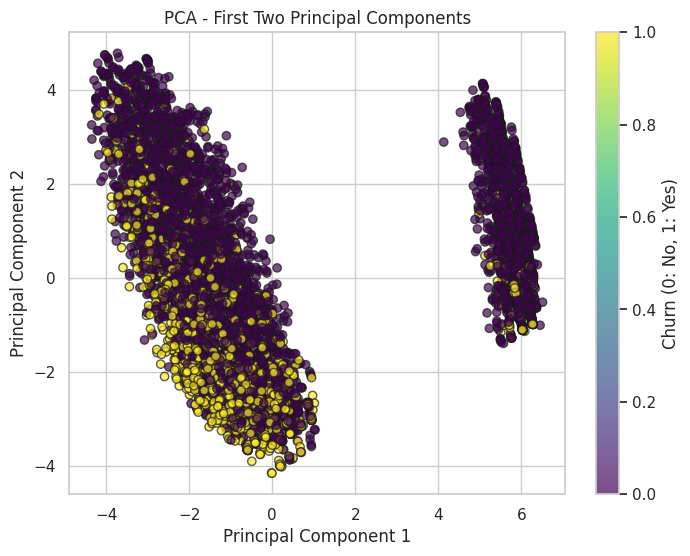

Explained Variance Ratio by each component: [0.32265373 0.13980236]


In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_encoded)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Churn (0: No, 1: Yes)')
plt.show()

print("Explained Variance Ratio by each component:", pca.explained_variance_ratio_)


In [115]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio by each component:", pca.explained_variance_ratio_)


Explained Variance Ratio by each component: [0.32265373 0.13980236 0.08717315]


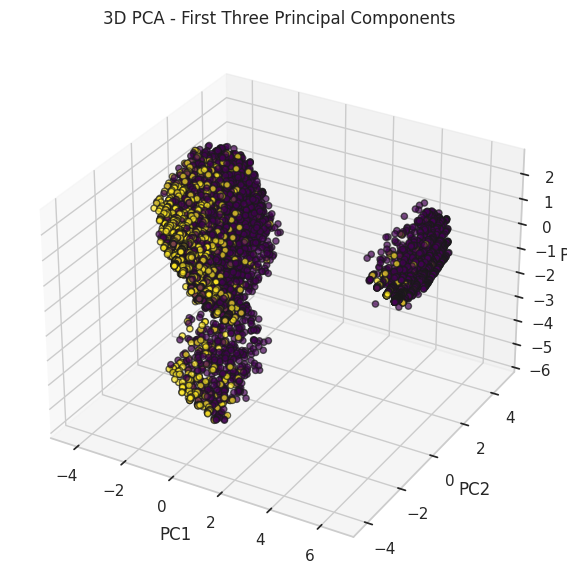

In [116]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA - First Three Principal Components')
plt.show()


In [117]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance: ", cumulative_variance)


Cumulative Explained Variance:  [0.32265373 0.46245609 0.54962924]


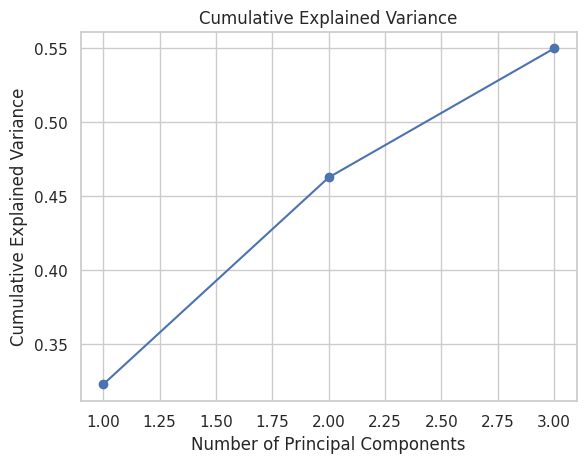

In [118]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


FEATURE ENGINEERING


In [24]:

X['MonthlyCharges_tenure'] = X['MonthlyCharges'] * X['tenure']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_interaction = RandomForestClassifier(n_estimators=100, random_state=42)
model_interaction.fit(X_train, y_train)


y_pred_interaction = model_interaction.predict(X_test)


print("Accuracy with Interaction Term:", accuracy_score(y_test, y_pred_interaction))
print("Confusion Matrix (Interaction Model):")
print(confusion_matrix(y_test, y_pred_interaction))
print("Classification Report (Interaction Model):")
print(classification_report(y_test, y_pred_interaction))


Accuracy with Interaction Term: 0.7913413768630234
Confusion Matrix (Interaction Model):
[[942  94]
 [200 173]]
Classification Report (Interaction Model):
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [46]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation Accuracy: {cv_scores.mean()}')


Cross-validation Accuracy: 0.789436717691464


CONFUSION MATRIX


In [47]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[674 362]
 [121 252]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1036
           1       0.41      0.68      0.51       373

    accuracy                           0.66      1409
   macro avg       0.63      0.66      0.62      1409
weighted avg       0.73      0.66      0.68      1409



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


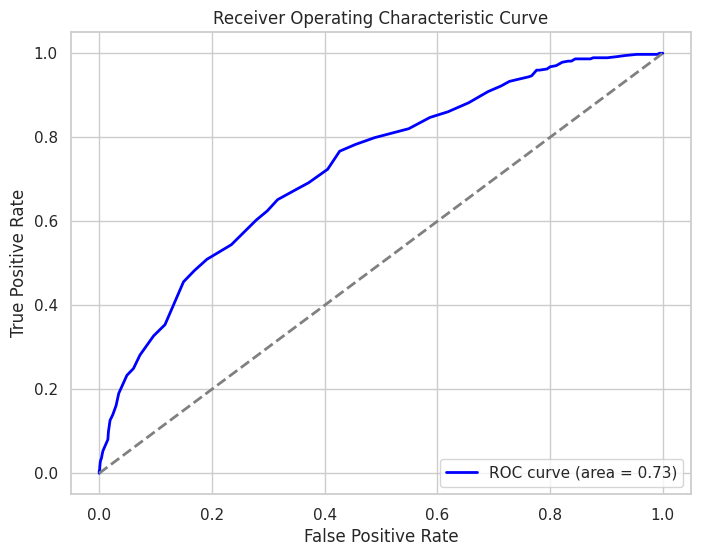

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()


FEATURE IMPORTANCE


In [50]:
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


             Feature  Importance
17    MonthlyCharges    0.177683
4             tenure    0.173179
18      TotalCharges    0.167220
14          Contract    0.079489
16     PaymentMethod    0.051590
8     OnlineSecurity    0.048792
11       TechSupport    0.043452
9       OnlineBackup    0.028495
0             gender    0.028259
15  PaperlessBilling    0.025961
7    InternetService    0.024539
2            Partner    0.023957
6      MultipleLines    0.023169
10  DeviceProtection    0.021556
1      SeniorCitizen    0.021121
3         Dependents    0.019854
13   StreamingMovies    0.018169
12       StreamingTV    0.017774
5       PhoneService    0.005739


<ipython-input-51-0383c4c1a5ed>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


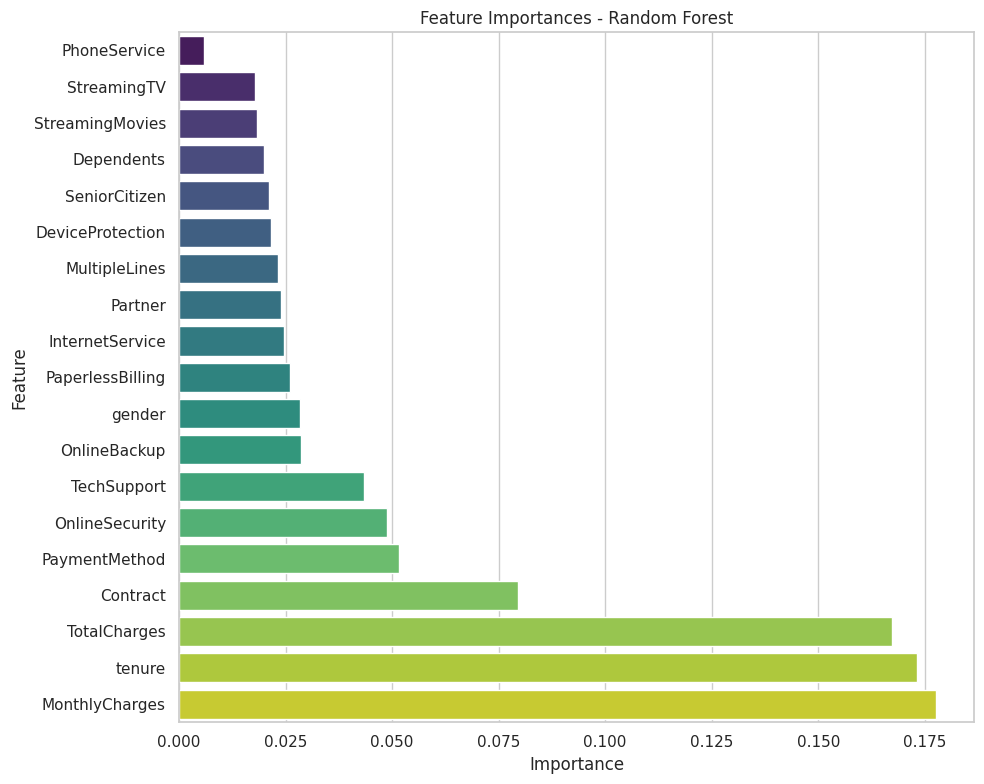

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feature_importance_df = pd.DataFrame({
    'Feature': [
        'MonthlyCharges', 'tenure', 'TotalCharges', 'Contract', 'PaymentMethod', 'OnlineSecurity',
        'TechSupport', 'OnlineBackup', 'gender', 'PaperlessBilling', 'InternetService',
        'Partner', 'MultipleLines', 'DeviceProtection', 'SeniorCitizen', 'Dependents',
        'StreamingMovies', 'StreamingTV', 'PhoneService'
    ],
    'Importance': [
        0.177683, 0.173179, 0.167220, 0.079489, 0.051590, 0.048792,
        0.043452, 0.028495, 0.028259, 0.025961, 0.024539,
        0.023957, 0.023169, 0.021556, 0.021121, 0.019854,
        0.018169, 0.017774, 0.005739
    ]
})


feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=True)


plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()


In [54]:
top_features = ['MonthlyCharges', 'tenure', 'TotalCharges', 'Contract', 'PaymentMethod']
X_top = df[top_features]


SVM MODEL

In [56]:
df = df.dropna()


In [57]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])


In [58]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]


In [61]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8018531717747683
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1059
           1       0.63      0.46      0.53       344

    accuracy                           0.80      1403
   macro avg       0.74      0.69      0.70      1403
weighted avg       0.79      0.80      0.79      1403

ROC AUC: 0.8085828556997606


DECISION TREE

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [109]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_encoded, y_train)


DecisionTreeClassifier(random_state=42)

In [110]:
y_pred_dt = model_dt.predict(X_test_encoded)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


              precision    recall  f1-score   support

          No       0.79      0.80      0.80      1036
         Yes       0.43      0.42      0.42       373

    accuracy                           0.70      1409
   macro avg       0.61      0.61      0.61      1409
weighted avg       0.70      0.70      0.70      1409

[[827 209]
 [217 156]]


In [ ]:
import numpy as np
import pandas as pd
from flask import Flask, render_template, request, jsonify
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Initialize Flask app
app = Flask(__name__)

# Load the pre-trained model
model = joblib.load('customer_churn_model.pkl')

# Initialize the scaler and other necessary transformations
scaler = StandardScaler()

# Preprocessing steps for the incoming data (this should match what you did during training)
# You may need to modify the preprocessing pipeline based on your model's requirements
def preprocess_input(data):
    # Example of preprocessing pipeline based on your trained model:
    # You might have column transformer or scaler or encoding
    data = pd.DataFrame(data)

    # Ensure the features match the model training data
    # Scaling/OneHot encoding (match with the model you trained)

    # If you have numerical columns and categorical columns
    # Example:
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

    # Preprocessing numeric data (e.g., scaling)
    data[numerical_cols] = scaler.transform(data[numerical_cols])

    # You could also apply OneHotEncoder or any other transformation needed for categorical columns

    return data

@app.route('/')
def index():
    return render_template('index.html')  # You need to create an HTML form for input

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from the user (from the form in the frontend)
    input_data = {
        'gender': request.form['gender'],
        'SeniorCitizen': request.form['SeniorCitizen'],
        'Partner': request.form['Partner'],
        'Dependents': request.form['Dependents'],
        'tenure': float(request.form['tenure']),
        'PhoneService': request.form['PhoneService'],
        'MultipleLines': request.form['MultipleLines'],
        'InternetService': request.form['InternetService'],
        'OnlineSecurity': request.form['OnlineSecurity'],
        'OnlineBackup': request.form['OnlineBackup'],
        'DeviceProtection': request.form['DeviceProtection'],
        'TechSupport': request.form['TechSupport'],
        'StreamingTV': request.form['StreamingTV'],
        'StreamingMovies': request.form['StreamingMovies'],
        'Contract': request.form['Contract'],
        'PaperlessBilling': request.form['PaperlessBilling'],
        'PaymentMethod': request.form['PaymentMethod'],
        'MonthlyCharges': float(request.form['MonthlyCharges']),
        'TotalCharges': float(request.form['TotalCharges']),
    }

    # Preprocess input data (apply the same transformations you used for training)
    processed_data = preprocess_input(input_data)

    # Predict with the trained model
    prediction = model.predict(processed_data)

    # Return the result
    if prediction == 0:
        result = "Customer will NOT churn."
    else:
        result = "Customer will churn."

    return render_template('index.html', prediction=result)

if __name__ == '__main__':
    app.run(debug=True)


In [111]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=model_dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train_encoded, y_train)
print("Best parameters:", grid_search.best_params_)
best_model_dt = grid_search.best_estimator_


y_pred_best_dt = best_model_dt.predict(X_test_encoded)
print(classification_report(y_test, y_pred_best_dt))
print(confusion_matrix(y_test, y_pred_best_dt))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1036
         Yes       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[919 117]
 [183 190]]


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

data = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')


X = data.drop('Churn', axis=1)
y = data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])


model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


model_pipeline.fit(X_train, y_train)


joblib.dump(model_pipeline, 'customer_churn_model.pkl')


accuracy = model_pipeline.score(X_test, y_test)
print(f'Model accuracy: {accuracy * 100:.2f}%')


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: ' '

In [124]:
import joblib


model = joblib.load('customer_churn_model.pkl')


prediction = model.predict(new_data)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_model.pkl'

In [127]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [128]:
data = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')


for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)




In [130]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


data = data.dropna(subset=numeric_cols + ['Churn'])
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


<ipython-input-130-e456f5dab0dd>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [131]:
data = data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)


In [132]:
data = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')

data = data.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numeric_cols + ['Churn'])
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
X = data.drop('Churn', axis=1)
y = data['Churn']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = [col for col in X.columns if col not in numerical_cols]
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', GaussianNB())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline.fit(X_train, y_train)


joblib.dump(model_pipeline, 'customer_churn_model.pkl')
print("Model saved as customer_churn_model.pkl")


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.